In [1]:

import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
from sklearn.metrics import mean_squared_error

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("marketing_campaign.csv",sep="\t")

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [5]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
df['Age'] = 2023 - df['Year_Birth']
df.drop(['Year_Birth',], axis=1, inplace=True)

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').dt.date

# finding correlations between variables

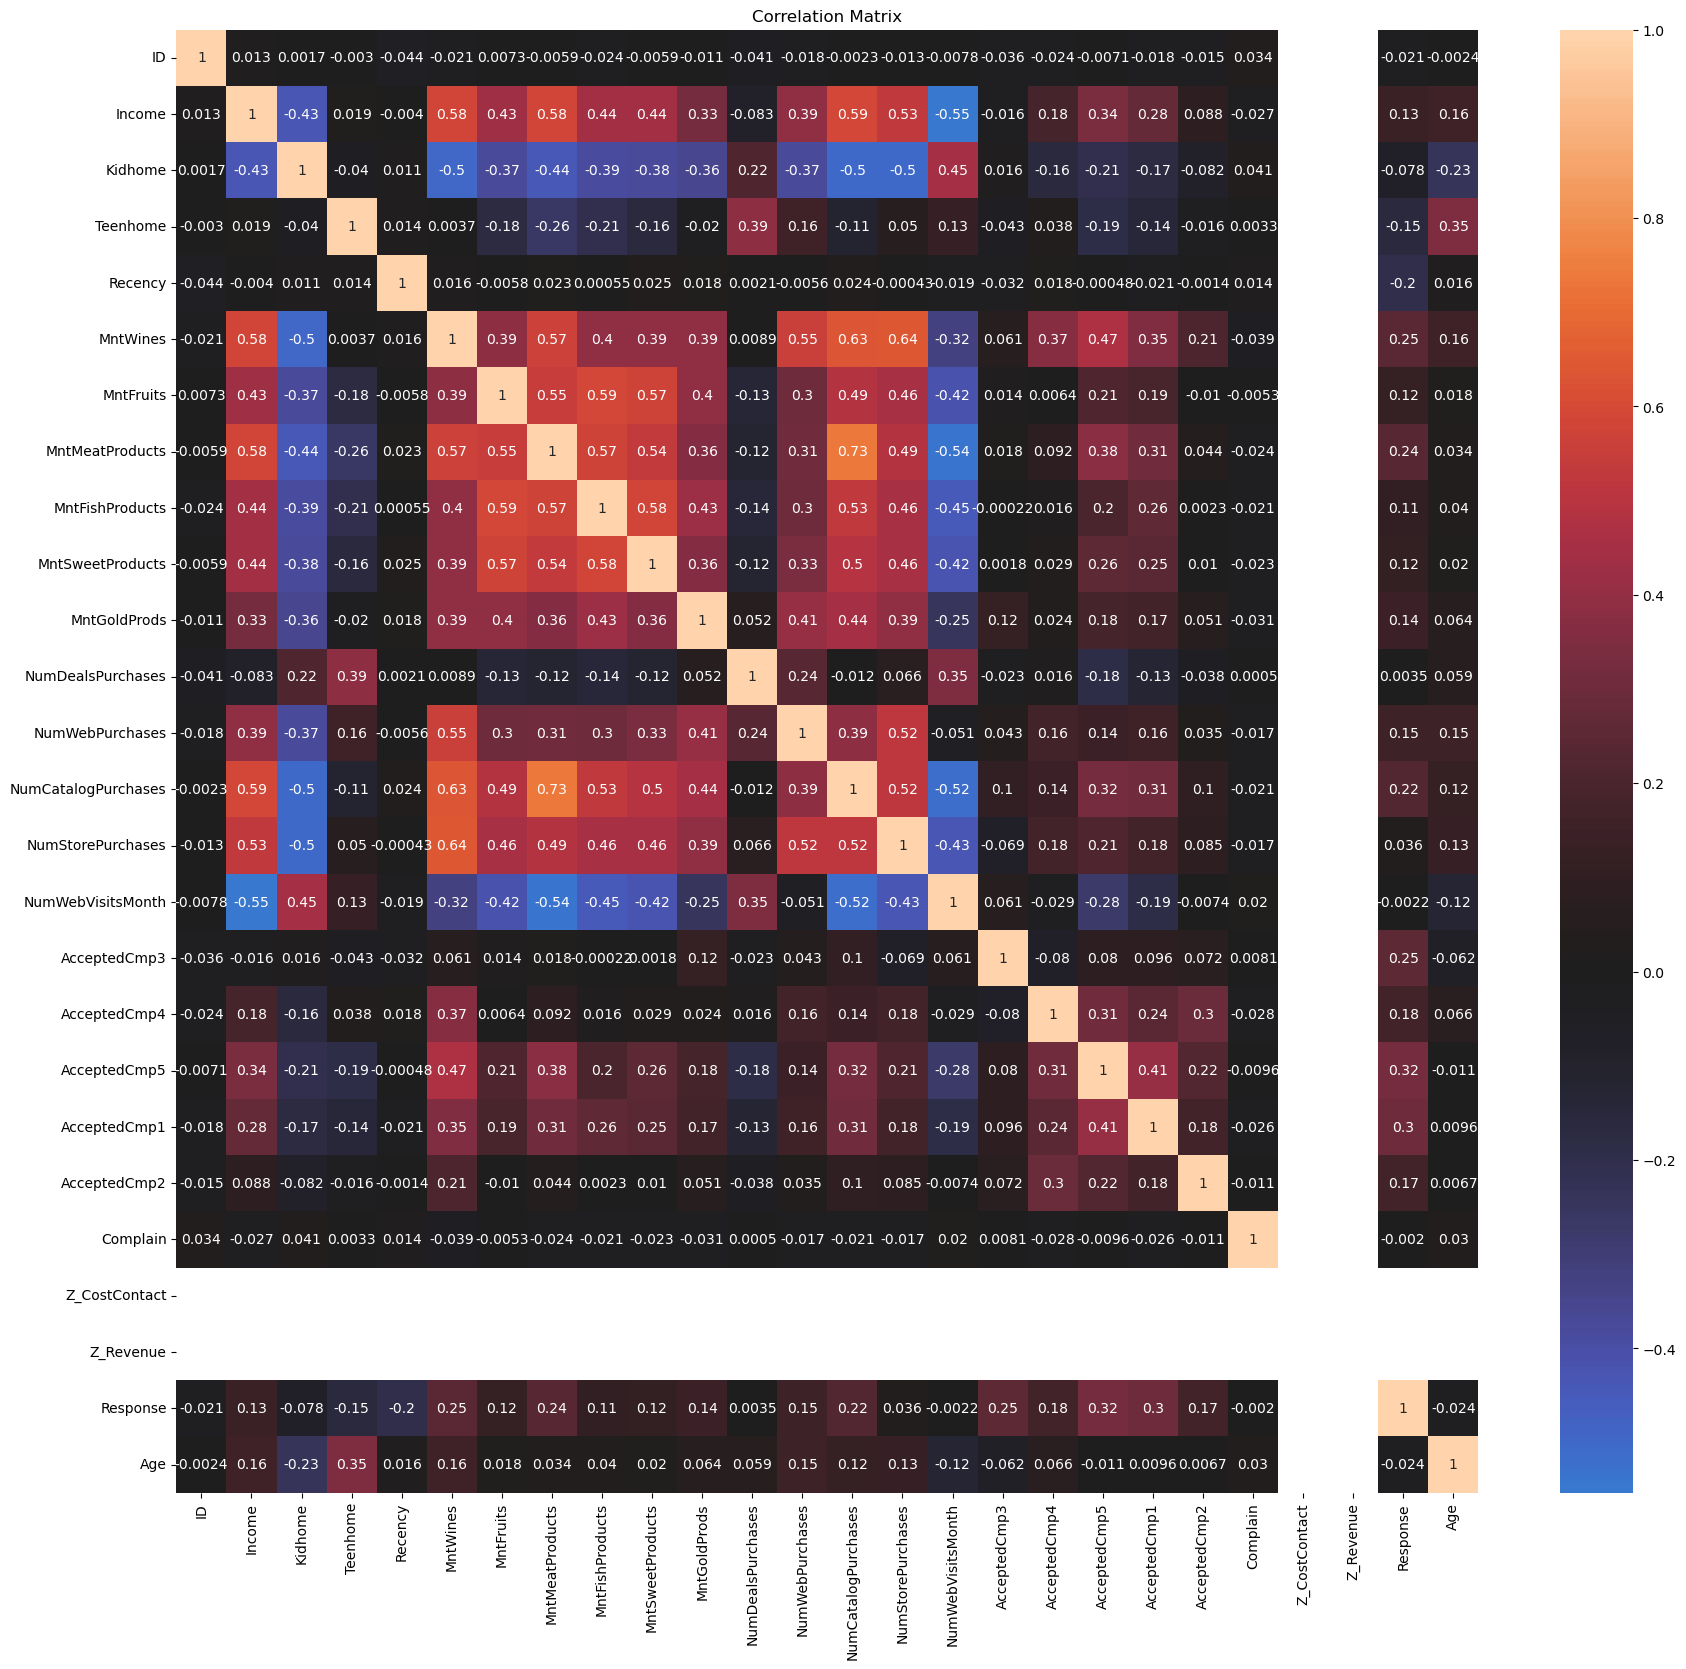

In [10]:
Corr = df.corr()
plt.figure(figsize=(21, 19))
sns.heatmap(Corr, center=0, annot=True)
_ = plt.title('Correlation Matrix')

In [11]:
correlations=df.corr().unstack().sort_values()

In [12]:
high_correlations = correlations[(abs(correlations) >= 0.5) & (abs(correlations) < 1)]
high_correlations

Income               NumWebVisitsMonth     -0.553088
NumWebVisitsMonth    Income                -0.553088
                     MntMeatProducts       -0.539484
MntMeatProducts      NumWebVisitsMonth     -0.539484
NumCatalogPurchases  NumWebVisitsMonth     -0.522004
NumWebVisitsMonth    NumCatalogPurchases   -0.522004
NumCatalogPurchases  Kidhome               -0.504501
Kidhome              NumCatalogPurchases   -0.504501
                     NumStorePurchases     -0.501349
NumStorePurchases    Kidhome               -0.501349
                     NumWebPurchases        0.516240
NumWebPurchases      NumStorePurchases      0.516240
NumCatalogPurchases  NumStorePurchases      0.517840
NumStorePurchases    NumCatalogPurchases    0.517840
Income               NumStorePurchases      0.529362
NumStorePurchases    Income                 0.529362
NumCatalogPurchases  MntFishProducts        0.532757
MntFishProducts      NumCatalogPurchases    0.532757
MntSweetProducts     MntMeatProducts        0.

In [13]:
# find all unique categories in a column with object data type
unique_Marital_Status = df['Marital_Status'].unique()

# print the unique categories
print(unique_Marital_Status)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [14]:
unique_Education = df['Education'].unique()

print(unique_Education)

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [15]:
df['Education'].replace(['Basic','2n Cycle','Graduation','Master','PhD'],[1,2,3,4,5],inplace=True)
df['Marital_Status'].replace(['Single','Alone','YOLO','Together','Married','Divorced','Widow','Absurd'],[1,2,3,4,5,6,7,8],inplace=True)

In [16]:
print(df.dtypes)

ID                       int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
dtype: object


In [17]:
df_Lin=df.drop(columns=['ID', 'AcceptedCmp3','AcceptedCmp1','AcceptedCmp2','AcceptedCmp4','AcceptedCmp5','Dt_Customer'])

# linear regression y=MntWines

In [18]:
x1=df_Lin.drop(columns=['MntWines'])
y1=df_Lin.MntWines
print(f'Shape of X: {x1.shape}')
print(f'Shape of Y: {y1.shape}')
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, random_state=0)
print(f'Sample size | Training: {len(x1_train)}, Test: {len(x1_test)}')

Shape of X: (2216, 21)
Shape of Y: (2216,)
Sample size | Training: 1772, Test: 444


In [19]:
reg_multi1 = OLS(y1_train, add_constant(x1_train))
results1 = reg_multi1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               MntWines   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     158.1
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:21:23   Log-Likelihood:                -11942.
No. Observations:                1772   AIC:                         2.392e+04
Df Residuals:                    1752   BIC:                         2.403e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Education              40.2818    

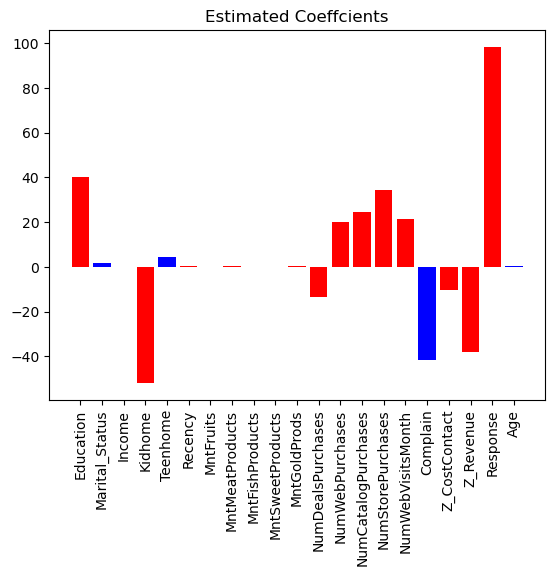

In [20]:
colors = ['red' if p < 0.05 else 'blue' for p in results1.pvalues]
plt.bar(np.arange(21), results1.params, color=colors)
plt.title('Estimated Coeffcients')
_ = plt.xticks(np.arange(21),list(x1.columns),rotation=90)

In [21]:
y1_train_hat = reg_multi1.predict(results1.params, add_constant(x1_train))
y1_test_hat = reg_multi1.predict(results1.params, add_constant(x1_test))
# MSE
RMSE_train1 = mean_squared_error(y1_train, y1_train_hat, squared=False)
RMSE_test1 = mean_squared_error(y1_test, y1_test_hat, squared=False)
print(f'RMSE | Training: {RMSE_train1:.4f}, Test: {RMSE_test1:.4f}')

RMSE | Training: 204.4826, Test: 191.5784


# linear regression y=MntFruits

In [22]:
x2=df_Lin.drop(columns=['MntFruits'])
y2=df_Lin.MntFruits
print(f'Shape of X: {x2.shape}')
print(f'Shape of Y: {y2.shape}')
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8, random_state=0)
print(f'Sample size | Training: {len(x2_train)}, Test: {len(x2_test)}')

Shape of X: (2216, 21)
Shape of Y: (2216,)
Sample size | Training: 1772, Test: 444


In [23]:
reg_multi2 = OLS(y2_train, add_constant(x2_train))
results2 = reg_multi2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              MntFruits   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     86.35
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          7.19e-235
Time:                        13:21:24   Log-Likelihood:                -8471.1
No. Observations:                1772   AIC:                         1.698e+04
Df Residuals:                    1752   BIC:                         1.709e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Education              -1.6672    

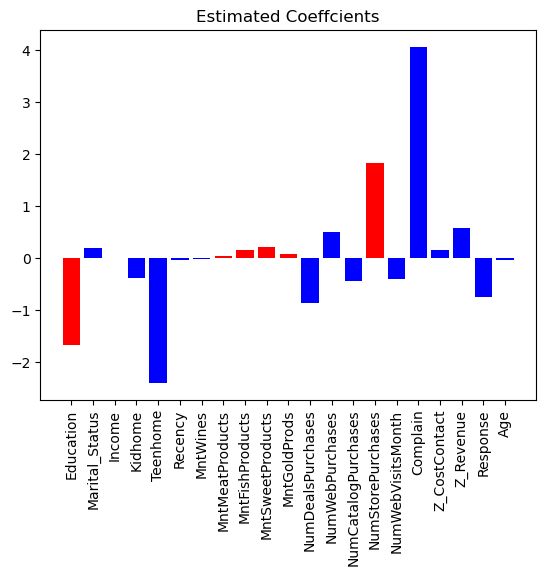

In [24]:
colors = ['red' if p < 0.05 else 'blue' for p in results2.pvalues]
plt.bar(np.arange(21), results2.params, color=colors)
plt.title('Estimated Coeffcients')
_ = plt.xticks(np.arange(21), list(x2.columns),rotation=90)

In [25]:
y2_train_hat = reg_multi2.predict(results2.params, add_constant(x2_train))
y2_test_hat = reg_multi2.predict(results2.params, add_constant(x2_test))
# MSE
RMSE_train2 = mean_squared_error(y2_train, y2_train_hat, squared=False)
RMSE_test2 = mean_squared_error(y2_test, y2_test_hat, squared=False)
print(f'RMSE | Training: {RMSE_train2:.4f}, Test: {RMSE_test2:.4f}')

RMSE | Training: 28.8353, Test: 27.5211


# linear regression y=MntMeatProducts

Shape of X: (2216, 21)
Shape of Y: (2216,)
Sample size | Training: 1772, Test: 444
                            OLS Regression Results                            
Dep. Variable:        MntMeatProducts   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 10 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:21:24   Log-Likelihood:                -11149.
No. Observations:                1772   AIC:                         2.234e+04
Df Residuals:                    1752   BIC:                         2.245e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

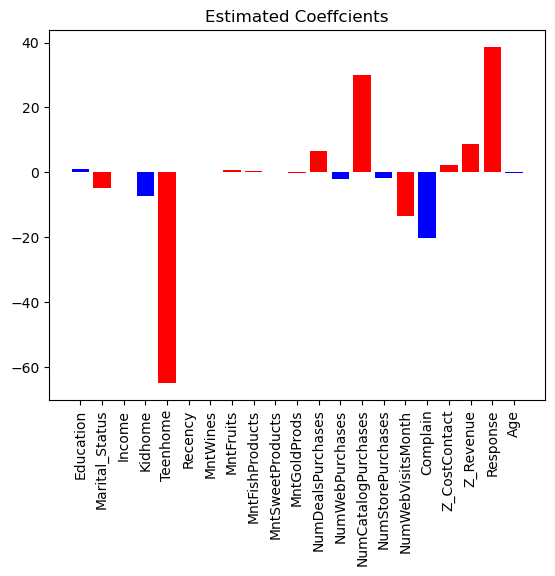

In [26]:
x3=df_Lin.drop(columns=['MntMeatProducts'])
y3=df_Lin.MntMeatProducts
print(f'Shape of X: {x3.shape}')
print(f'Shape of Y: {y3.shape}')
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size=0.8, random_state=0)
print(f'Sample size | Training: {len(x3_train)}, Test: {len(x3_test)}')


reg_multi3 = OLS(y3_train, add_constant(x3_train))
results3 = reg_multi3.fit()
print(results3.summary())

colors = ['red' if p < 0.05 else 'blue' for p in results3.pvalues]
plt.bar(np.arange(21), results3.params, color=colors)
plt.title('Estimated Coeffcients')
_ = plt.xticks(np.arange(21),list(x3.columns),rotation=90)


In [27]:
y3_train_hat = reg_multi3.predict(results3.params, add_constant(x3_train))
y3_test_hat = reg_multi3.predict(results3.params, add_constant(x3_test))
# MSE
RMSE_train3 = mean_squared_error(y3_train, y3_train_hat, squared=False)
RMSE_test3 = mean_squared_error(y3_test, y3_test_hat, squared=False)
print(f'RMSE | Training: {RMSE_train3:.4f}, Test: {RMSE_test3:.4f}')

RMSE | Training: 130.6838, Test: 123.9183


# linear regression y=MntFishProducts

Shape of X: (2216, 21)
Shape of Y: (2216,)
Sample size | Training: 1772, Test: 444
                            OLS Regression Results                            
Dep. Variable:        MntFishProducts   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     96.87
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          1.99e-256
Time:                        13:21:49   Log-Likelihood:                -9002.2
No. Observations:                1772   AIC:                         1.804e+04
Df Residuals:                    1752   BIC:                         1.815e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

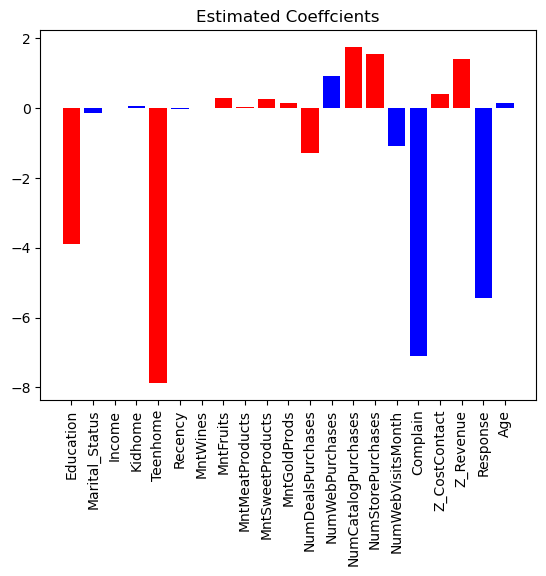

In [29]:
x4=df_Lin.drop(columns=['MntFishProducts'])
y4=df_Lin.MntFishProducts
print(f'Shape of X: {x4.shape}')
print(f'Shape of Y: {y4.shape}')
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, train_size=0.8, random_state=0)
print(f'Sample size | Training: {len(x4_train)}, Test: {len(x4_test)}')


reg_multi4 = OLS(y4_train, add_constant(x4_train))
results4 = reg_multi4.fit()
print(results4.summary())

colors = ['red' if p < 0.05 else 'blue' for p in results4.pvalues]
plt.bar(np.arange(21), results4.params, color=colors)
plt.title('Estimated Coeffcients')
_ = plt.xticks(np.arange(21),list(x4.columns),rotation=90)

In [30]:
y4_train_hat = reg_multi4.predict(results4.params, add_constant(x4_train))
y4_test_hat = reg_multi4.predict(results4.params, add_constant(x4_test))
# MSE
RMSE_train4 = mean_squared_error(y4_train, y4_train_hat, squared=False)
RMSE_test4 = mean_squared_error(y4_test, y4_test_hat, squared=False)
print(f'RMSE | Training: {RMSE_train4:.4f}, Test: {RMSE_test4:.4f}')

RMSE | Training: 38.9130, Test: 32.5412


# linear regression y=MntSweetProducts

Shape of X: (2216, 21)
Shape of Y: (2216,)
Sample size | Training: 1772, Test: 444
                            OLS Regression Results                            
Dep. Variable:       MntSweetProducts   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     81.34
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          3.68e-224
Time:                        13:21:56   Log-Likelihood:                -8549.2
No. Observations:                1772   AIC:                         1.714e+04
Df Residuals:                    1752   BIC:                         1.725e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

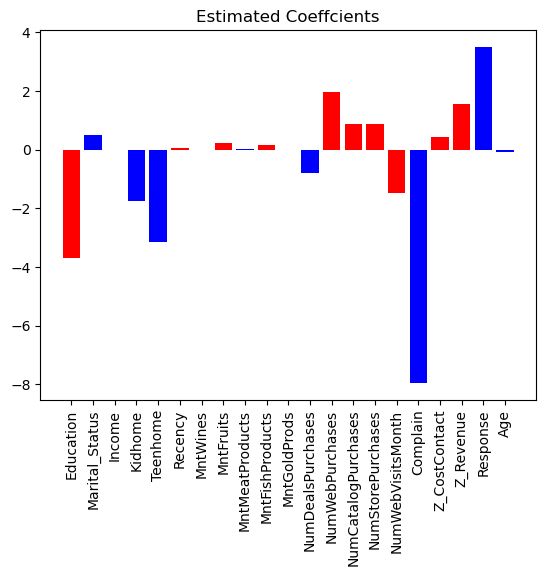

In [31]:
x5=df_Lin.drop(columns=['MntSweetProducts'])
y5=df_Lin.MntSweetProducts
print(f'Shape of X: {x5.shape}')
print(f'Shape of Y: {y5.shape}')
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, train_size=0.8, random_state=0)
print(f'Sample size | Training: {len(x5_train)}, Test: {len(x5_test)}')


reg_multi5 = OLS(y5_train, add_constant(x5_train))
results5 = reg_multi5.fit()
print(results5.summary())

colors = ['red' if p < 0.05 else 'blue' for p in results5.pvalues]
plt.bar(np.arange(21), results5.params, color=colors)
plt.title('Estimated Coeffcients')
_ = plt.xticks(np.arange(21),list(x5.columns),rotation=90)

In [32]:
y5_train_hat = reg_multi5.predict(results5.params, add_constant(x5_train))
y5_test_hat = reg_multi5.predict(results5.params, add_constant(x5_test))
# MSE
RMSE_train5 = mean_squared_error(y5_train, y5_train_hat, squared=False)
RMSE_test5 = mean_squared_error(y5_test, y5_test_hat, squared=False)
print(f'RMSE | Training: {RMSE_train5:.4f}, Test: {RMSE_test5:.4f}')

RMSE | Training: 30.1349, Test: 27.6834


# linear regression y=MntGoldProds

Shape of X: (2216, 21)
Shape of Y: (2216,)
Sample size | Training: 1772, Test: 444
                            OLS Regression Results                            
Dep. Variable:           MntGoldProds   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     50.49
Date:                Mon, 10 Apr 2023   Prob (F-statistic):          1.01e-150
Time:                        13:21:59   Log-Likelihood:                -9110.8
No. Observations:                1772   AIC:                         1.826e+04
Df Residuals:                    1752   BIC:                         1.837e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

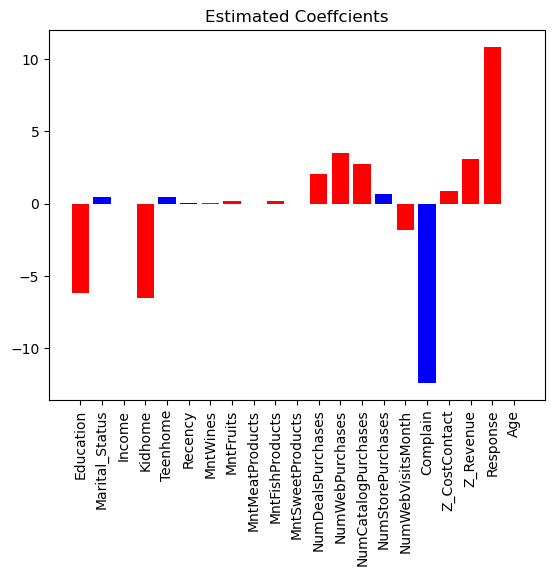

In [33]:
x6=df_Lin.drop(columns=['MntGoldProds'])
y6=df_Lin.MntGoldProds
print(f'Shape of X: {x6.shape}')
print(f'Shape of Y: {y6.shape}')
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, train_size=0.8, random_state=0)
print(f'Sample size | Training: {len(x6_train)}, Test: {len(x6_test)}')


reg_multi6 = OLS(y6_train, add_constant(x6_train))
results6 = reg_multi6.fit()
print(results6.summary())

colors = ['red' if p < 0.05 else 'blue' for p in results6.pvalues]
plt.bar(np.arange(21), results6.params, color=colors)
plt.title('Estimated Coeffcients')
_ = plt.xticks(np.arange(21), list(x6.columns),rotation=90)

In [34]:
y6_train_hat = reg_multi6.predict(results6.params, add_constant(x6_train))
y6_test_hat = reg_multi6.predict(results6.params, add_constant(x6_test))
# MSE
RMSE_train6 = mean_squared_error(y6_train, y6_train_hat, squared=False)
RMSE_test6 = mean_squared_error(y6_test, y6_test_hat, squared=False)
print(f'RMSE | Training: {RMSE_train6:.4f}, Test: {RMSE_test6:.4f}')

RMSE | Training: 41.3718, Test: 45.6713
